<a href="https://colab.research.google.com/github/Kanavpuri743/Portfolio-Hedging-and-Performance-Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# from google.colab import files
# uploaded = files.upload()


In [57]:
!wget https://raw.githubusercontent.com/Kanavpuri743/Portfolio-Hedging-and-Performance-Analysis/main/Book3.csv
import pandas as pd
df = pd.read_csv('Book3.csv')


--2025-06-24 06:00:11--  https://raw.githubusercontent.com/Kanavpuri743/Portfolio-Hedging-and-Performance-Analysis/main/Book3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25818 (25K) [text/plain]
Saving to: ‘Book3.csv.1’

Book3.csv.1         100%[===================>]  25.21K  --.-KB/s    in 0.001s  

2025-06-24 06:00:11 (44.5 MB/s) - ‘Book3.csv.1’ saved [25818/25818]



In [58]:
import pandas as pd

# Load file
df = pd.read_csv("Book3.csv")

# Define the return columns
return_columns = ['ACC_returns', 'AXBX_returns', 'BPCL_returns', 'CIPL_returns',
                  'DLF_returns', 'INFY_returns', 'LT_returns', 'MRTI_returns']
returns_df = df[return_columns]

# Drop the first (NaN) and last (Beta) row
returns_df = returns_df.iloc[1:-1]

# Convert to float
returns_df = returns_df.astype(float)

# Define investment and weights
Investment = [30000, 125000, 180000, 65000, 100000, 75000, 85000, 140000]
total = sum(Investment)
weights = [inv / total for inv in Investment]

# Calculate portfolio returns
portfolio_returns = returns_df.dot(weights)

# Output sample and shape
print(portfolio_returns.head())
print("Total trading days used:", len(portfolio_returns))


1    0.006766
2   -0.004324
3    0.003551
4   -0.002728
5    0.003595
dtype: float64
Total trading days used: 124


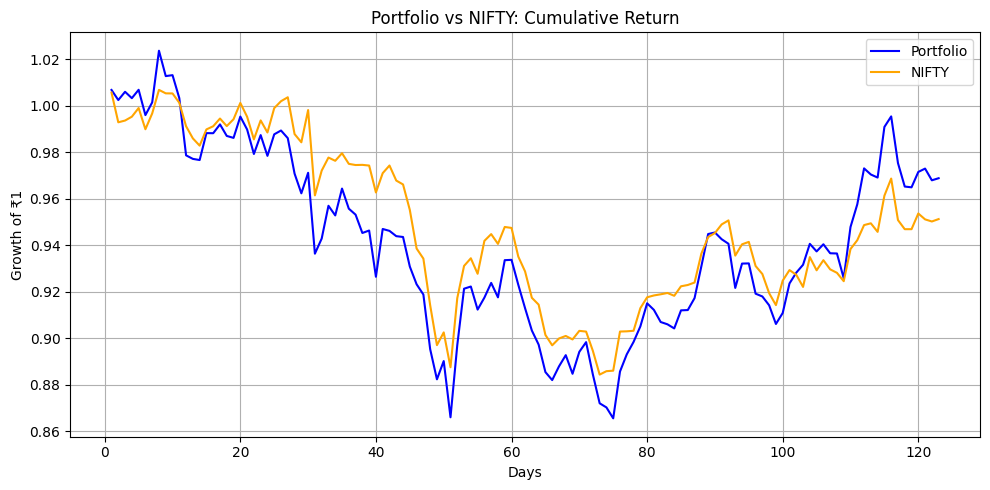

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Book3.csv to get NIFTY returns only
df = pd.read_csv("Book3.csv")
nifty_returns = df['Nifty_returns'].iloc[1:-1].astype(float)  # This gives a Series


# Step 2: Compute cumulative returns
portfolio_cum = (1 + portfolio_returns).cumprod()
nifty_cum = (1 + nifty_returns).cumprod()

# Step 3: Plot both
plt.figure(figsize=(10, 5))
plt.plot(portfolio_cum, label="Portfolio", color='blue')
plt.plot(nifty_cum, label="NIFTY", color='orange')
plt.title("Portfolio vs NIFTY: Cumulative Return")
plt.xlabel("Days")
plt.ylabel("Growth of ₹1")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [60]:
# Portfolio Metrics
avg_daily_return_p = portfolio_returns.mean()
annual_return_p = avg_daily_return_p * 252
daily_volatility_p = portfolio_returns.std()
annual_volatility_p = daily_volatility_p * (252 ** 0.5)
risk_free_rate = 0.06
sharpe_ratio_p = (annual_return_p - risk_free_rate) / annual_volatility_p

print("---- Portfolio Performance ----")
print(f"Average Daily Return: {avg_daily_return_p:.4%}")
print(f"Annual Return: {annual_return_p:.2%}")
print(f"Annual Volatility: {annual_volatility_p:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_p:.2f}")
print()

# NIFTY Metrics
avg_daily_return_n = nifty_returns.mean()
annual_return_n = avg_daily_return_n * 252
daily_volatility_n = nifty_returns.std()
annual_volatility_n = daily_volatility_n * (252 ** 0.5)
sharpe_ratio_n = (annual_return_n - risk_free_rate) / annual_volatility_n

print("---- NIFTY Performance ----")
print(f"Average Daily Return: {avg_daily_return_n:.4%}")
print(f"Annual Return: {annual_return_n:.2%}")
print(f"Annual Volatility: {annual_volatility_n:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_n:.2f}")


---- Portfolio Performance ----
Average Daily Return: -0.0192%
Annual Return: -4.84%
Annual Volatility: 18.27%
Sharpe Ratio: -0.59

---- NIFTY Performance ----
Average Daily Return: -0.0364%
Annual Return: -9.18%
Annual Volatility: 14.63%
Sharpe Ratio: -1.04


In [61]:
import pandas as pd
import math  # <-- required to use math.isnan()

df = pd.read_csv('Book3.csv')

Investment = [30000, 125000, 180000, 65000, 100000, 75000, 85000, 140000]

# Step 1: Get the last row
last_row = df.iloc[-1]

# Step 2: Filter only numeric (float) values, excluding NaNs
Beta_values = []
for val in last_row:
    try:
        fval = float(val)
        if not math.isnan(fval):  # skip if it's NaN
            Beta_values.append(fval)
    except:
        continue  # skip if not convertible to float

# Step 3: Compute total investment
print("Beta Values:", Beta_values)
total = sum(Investment)
print("Total Investment:", total)

# Step 4: Compute weighted values
portfolio_weighted = [(Investment[i] / total) * Beta_values[i] for i in range(len(Investment))]

# Step 5: Output
print("Portfolio Weighted Values:", portfolio_weighted)
print(sum(portfolio_weighted))


Beta Values: [0.822177316, 1.058229181, 1.02176015, 0.923691038, 0.8485, 1.22, 1.271218959, 0.854734709]
Total Investment: 800000
Portfolio Weighted Values: [0.030831649349999997, 0.16534830953125, 0.22989603375, 0.0750498968375, 0.1060625, 0.114375, 0.13506701439375, 0.149578574075]
1.0062089779375


In [62]:
Weighted_beta = 0
for i in range(len(Beta_values)):
    Weighted_beta += portfolio_weighted[i] * Beta_values[i]

print("Weighted Portfolio Beta:", Weighted_beta)

if(Weighted_beta > 0):
  print("Go long")
else:
  print("Go short")

Weighted Portfolio Beta: 1.0336282915933446
Go long


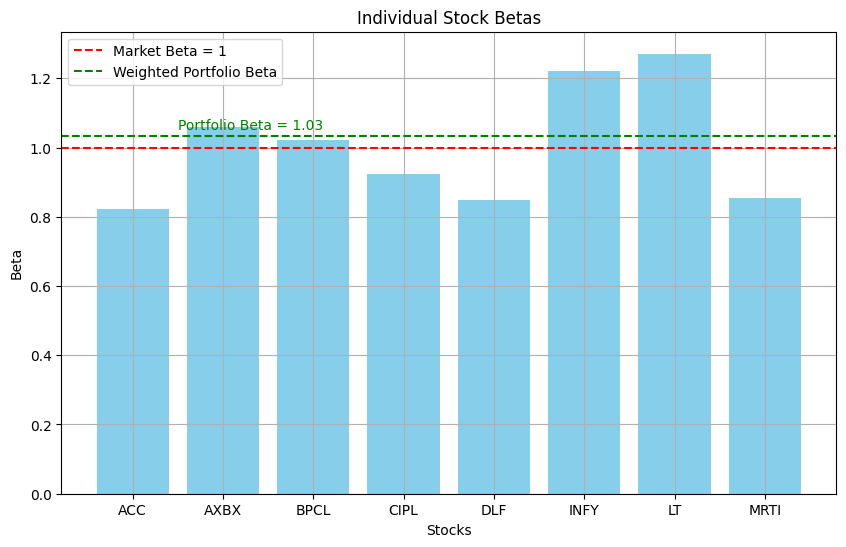

In [63]:
import matplotlib.pyplot as plt

stock_names = ['ACC', 'AXBX', 'BPCL', 'CIPL', 'DLF', 'INFY', 'LT', 'MRTI']
plt.figure(figsize=(10, 6))
plt.bar(stock_names, Beta_values, color='skyblue')
plt.title("Individual Stock Betas")
plt.xlabel("Stocks")
plt.ylabel("Beta")

# Horizontal lines
plt.axhline(y=1, color='r', linestyle='--', label="Market Beta = 1")
plt.axhline(y=Weighted_beta, color='g', linestyle='--', label="Weighted Portfolio Beta")

# Annotate Weighted Beta value
plt.text(x=0.5, y=Weighted_beta + 0.02, s=f"Portfolio Beta = {Weighted_beta:.2f}", color='green', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()


In [64]:
# Future Hedging Calculation
portfolio_val = total
beta = Weighted_beta
nifty_level = 25193.45
lot_size = 75

# Hedge value (beta-adjusted exposure)
hedge_val = portfolio_val * beta

# Single futures contract value
contract_val = nifty_level * lot_size

# Number of lots required to hedge
number_of_lots = hedge_val / contract_val

print(f"Hedge Exposure Value: ₹{hedge_val:,.2f}")
print(f"Contract Value (per lot): ₹{contract_val:,.2f}")
print(f"Number of NIFTY Futures Lots to Trade: {number_of_lots:.2f}")

Hedge Exposure Value: ₹826,902.63
Contract Value (per lot): ₹1,889,508.75
Number of NIFTY Futures Lots to Trade: 0.44


In [65]:
#Nifty changes

import numpy as np
import pandas as pd

# Inputs
beta = Weighted_beta
portfolio_val = total
nifty_level = 25193.45
lot_size = 75
num_lots = number_of_lots  # from your earlier hedge calc

# Simulate NIFTY changes from -5% to +5%
market_moves = np.arange(-0.05, 0.051, 0.01)
data = []

for move in market_moves:
    nifty_new = nifty_level * (1 + move)
    nifty_change = nifty_new - nifty_level

    # Portfolio return (approximate using beta)
    portfolio_return = beta * move
    portfolio_pnl = portfolio_val * portfolio_return

    # Futures P&L (short position: gain if NIFTY falls)
    futures_pnl = -num_lots * lot_size * nifty_change

    # Net P&L after hedge
    net_pnl = portfolio_pnl + futures_pnl

    data.append({
        "NIFTY % Change": f"{move*100:.0f}%",
        "Portfolio P&L (₹)": round(portfolio_pnl, 2),
        "Futures Hedge P&L (₹)": round(futures_pnl, 2),
        "Net P&L (₹)": round(net_pnl, 2)
    })

# Display as DataFrame
results_df = pd.DataFrame(data)
print(results_df)


   NIFTY % Change  Portfolio P&L (₹)  Futures Hedge P&L (₹)  Net P&L (₹)
0             -5%          -41345.13               41345.13          0.0
1             -4%          -33076.11               33076.11          0.0
2             -3%          -24807.08               24807.08          0.0
3             -2%          -16538.05               16538.05         -0.0
4             -1%           -8269.03                8269.03         -0.0
5              0%               0.00                  -0.00          0.0
6              1%            8269.03               -8269.03          0.0
7              2%           16538.05              -16538.05          0.0
8              3%           24807.08              -24807.08         -0.0
9              4%           33076.11              -33076.11         -0.0
10             5%           41345.13              -41345.13          0.0


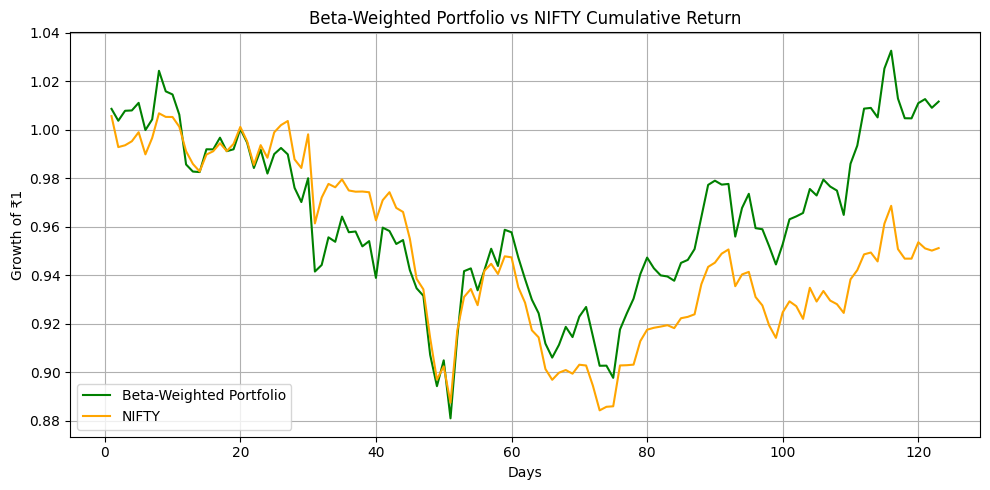

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load return data
df = pd.read_csv("Book3.csv")

# Step 1: Clean stock return columns (drop first and last row)
return_columns = ['ACC_returns', 'AXBX_returns', 'BPCL_returns', 'CIPL_returns',
                  'DLF_returns', 'INFY_returns', 'LT_returns', 'MRTI_returns']
returns_df = df[return_columns].iloc[1:-1].astype(float)

# Step 2: Define beta values and convert to weights
# Beta_values = [0.78, 1.12, 1.01, 0.94, 1.08, 0.89, 1.25, 1.15]  # your values
beta_sum = sum(Beta_values)
beta_weights = [b / beta_sum for b in Beta_values]  # normalize

# Step 3: Compute beta-weighted portfolio returns
beta_portfolio_returns = returns_df.dot(beta_weights)

# Step 4: Get NIFTY returns
nifty_returns = df['Nifty_returns'].iloc[1:-1].astype(float)

# Step 5: Cumulative returns
beta_port_cum = (1 + beta_portfolio_returns).cumprod()
nifty_cum = (1 + nifty_returns).cumprod()

# Step 6: Plot
plt.figure(figsize=(10, 5))
plt.plot(beta_port_cum, label="Beta-Weighted Portfolio", color='green')
plt.plot(nifty_cum, label="NIFTY", color='orange')
plt.title("Beta-Weighted Portfolio vs NIFTY Cumulative Return")
plt.xlabel("Days")
plt.ylabel("Growth of ₹1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
# Already calculated earlier:
# beta_portfolio_returns = returns_df.dot(beta_weights)

# Risk-free rate (e.g., 6% annually)
risk_free_rate = 0.06

# Step 1: Mean daily return
avg_daily_return_beta = beta_portfolio_returns.mean()

# Step 2: Annual return (252 trading days)
annual_return_beta = avg_daily_return_beta * 252

# Step 3: Daily & annual volatility
daily_volatility_beta = beta_portfolio_returns.std()
annual_volatility_beta = daily_volatility_beta * (252 ** 0.5)

# Step 4: Sharpe Ratio
sharpe_beta = (annual_return_beta - risk_free_rate) / annual_volatility_beta

# Print results
print("📊 Beta-Weighted Portfolio Performance:")
print(f"Average Daily Return: {avg_daily_return_beta:.4%}")
print(f"Annual Return: {annual_return_beta:.2%}")
print(f"Annual Volatility: {annual_volatility_beta:.2%}")
print(f"Sharpe Ratio: {sharpe_beta:.2f}")


📊 Beta-Weighted Portfolio Performance:
Average Daily Return: 0.0156%
Annual Return: 3.94%
Annual Volatility: 17.80%
Sharpe Ratio: -0.12


In [68]:
import pandas as pd
import numpy as np

# Risk-free rate
rf = 0.06

# Calculate for NIFTY
avg_n = nifty_returns.mean()
ann_ret_n = avg_n * 252
vol_n = nifty_returns.std() * np.sqrt(252)
sharpe_n = (ann_ret_n - rf) / vol_n

# Investment-weighted portfolio (already exists)
avg_p = portfolio_returns.mean()
ann_ret_p = avg_p * 252
vol_p = portfolio_returns.std() * np.sqrt(252)
sharpe_p = (ann_ret_p - rf) / vol_p

# Beta-weighted portfolio
avg_b = beta_portfolio_returns.mean()
ann_ret_b = avg_b * 252
vol_b = beta_portfolio_returns.std() * np.sqrt(252)
sharpe_b = (ann_ret_b - rf) / vol_b

# Summary Table
summary = pd.DataFrame({
    "Metric": ["Average Daily Return", "Annual Return", "Annual Volatility", "Sharpe Ratio"],
    "NIFTY": [f"{avg_n:.4%}", f"{ann_ret_n:.2%}", f"{vol_n:.2%}", f"{sharpe_n:.2f}"],
    "Investment Portfolio": [f"{avg_p:.4%}", f"{ann_ret_p:.2%}", f"{vol_p:.2%}", f"{sharpe_p:.2f}"],
    "Beta-Weighted Portfolio": [f"{avg_b:.4%}", f"{ann_ret_b:.2%}", f"{vol_b:.2%}", f"{sharpe_b:.2f}"]
})

# Show result
print(summary)


                 Metric     NIFTY Investment Portfolio Beta-Weighted Portfolio
0  Average Daily Return  -0.0364%             -0.0192%                 0.0156%
1         Annual Return    -9.18%               -4.84%                   3.94%
2     Annual Volatility    14.63%               18.27%                  17.80%
3          Sharpe Ratio     -1.04                -0.59                   -0.12
